# back-dated events

## setup

In [ ]:
%pylab inline

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import db_diff as db

In [4]:
config = db.load_config('../../etc/prod-ostro/aws.json')
engine = db.rs_connect('ostro', config)
conn = engine.connect()
conn.execute("SET search_path TO leviathan")

## read data

In [5]:
sql = """
select
    to_char("timestamp", 'YYYYMMDD') as event_day,
    extract(hour from "timestamp") event_hour,
    insertid
from power_out
where date("timestamp") between '2017-09-04' and '2017-10-05'
"""

In [8]:
df = pd.read_sql(sql, con=conn)

In [191]:
df.dtypes

event_day     object
event_hour     int64
insertid       int64
dtype: object

In [192]:
df[:5]

,event_day,event_hour,insertid
0,20170904,2,20150
1,20170904,7,18969
2,20170904,10,18975
3,20170904,10,19027
4,20170904,13,20178


## distribution of insertid

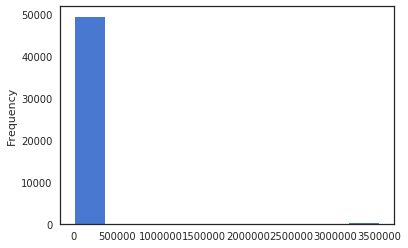

In [193]:
df['insertid'].plot.hist()

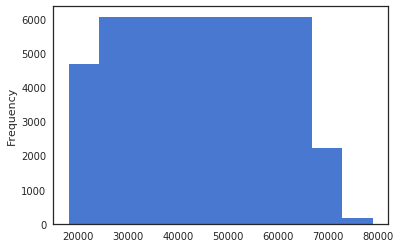

In [194]:
df[df['insertid'] < 100000]['insertid'].plot.hist()

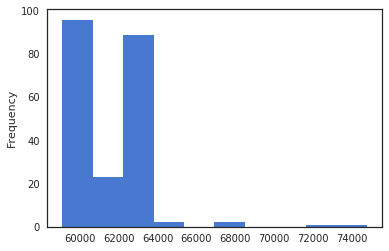

In [195]:
df[(df['event_day'] == '20171004') & (df['event_hour'] == 12)]['insertid'].plot.hist()

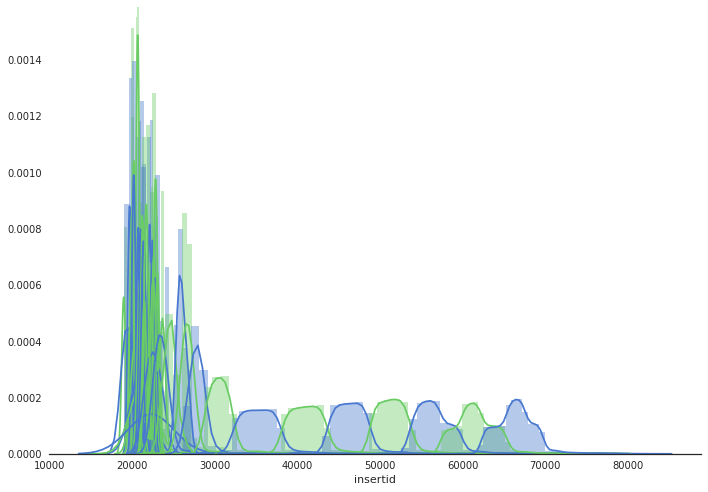

In [196]:
sns.set(style="white", palette="muted")
f, axes = plt.subplots(1, 1, figsize=(10, 7), sharex=True)
sns.despine(left=True)

b, g, r, p = sns.color_palette("muted", 4)

for d in df['event_day'].unique():
    if int(d) % 2 == 0: c=g
    else: c=b
    sns.distplot(df[(df['event_day'] == d) & (df['insertid'] < 100000)]['insertid'], color=c)

plt.tight_layout()